Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 4.9, Figures 4.4, 4.7 and 4.8, and Table 4.3

Analysis of hourly precipitation data from 2015 in Oregon, Hawaii and Rhode Island\
Topics: [Joint probability mass function](https://www.youtube.com/watch?v=M7NC5FnyjbY), [marginal distribution](https://www.youtube.com/watch?v=tGNapfqZENg), [conditional distribution, independence, conditional independence](https://www.youtube.com/watch?v=YMvjhHg3Gxg)

Author: Carlos Fernandez-Granda\
Data source: https://www1.ncdc.noaa.gov/pub/data/uscrn/products/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import urllib.request
import io

font_size = 12
font_size_ticks = 12

np.set_printoptions(precision=3)

# file_name_precipitation_2015 = "../data/weather/precipitation_2015.npy"
# file_name_precipitation_2016 = "../data/weather/precipitation_2016.npy"
# data_matrix_2015 = np.load(file_name_precipitation_2015)
# data_matrix_2016 = np.load(file_name_precipitation_2016)
# file_name_list = np.load('../data/weather/weather_station_names.npy')

# Raw GitHub URLs
url_2015 = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/weather/precipitation_2015.npy"
url_2016 = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/weather/precipitation_2016.npy"
url_names = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/weather/weather_station_names.npy"

# Load .npy files from URLs
with urllib.request.urlopen(url_2015) as response:
    data_matrix_2015 = np.load(io.BytesIO(response.read()))

with urllib.request.urlopen(url_2016) as response:
    data_matrix_2016 = np.load(io.BytesIO(response.read()))

with urllib.request.urlopen(url_names) as response:
    file_name_list = np.load(io.BytesIO(response.read()))

In [2]:
def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

stations = [99,100,101]
for station in stations:
    print(process_name(file_name_list[station])) 

CoosBay, OR
Corvallis, OR
JohnDay, OR


In [3]:
def compute_joint_pmf(station_1,station_2,station_3,data_matrix):
    submatrix = data_matrix[:,[station_1,station_2,station_3]]
    total_count = 0.
    counts = np.zeros((2,2,2))
    for ind in range(submatrix.shape[0]):
        rain_1 = int(submatrix[ind,0] > 0.)
        rain_2 = int(submatrix[ind,1] > 0.)
        rain_3 = int(submatrix[ind,2] > 0.)
        total_count += 1
        counts[rain_1,rain_2,rain_3] += 1
    joint_pmf = counts/total_count
    return counts,joint_pmf

counts,joint_pmf = compute_joint_pmf(stations[0],stations[1],stations[2],data_matrix_2015)
print("Joint probability mass function",joint_pmf);

Joint probability mass function [[[0.828 0.018]
  [0.036 0.004]]

 [[0.053 0.003]
  [0.049 0.008]]]


Marginal probability mass functions
CoosBay, OR
[0.887 0.113]
Corvallis, OR
[0.903 0.097]
JohnDay, OR
[0.966 0.034]


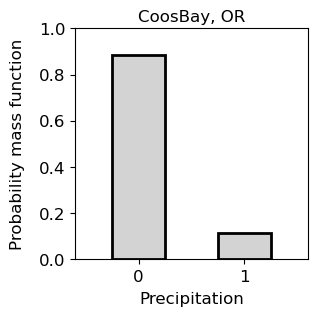

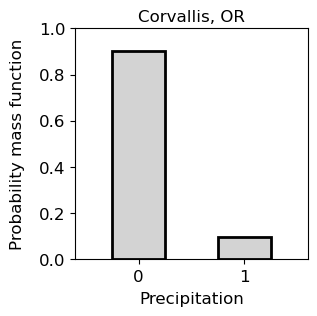

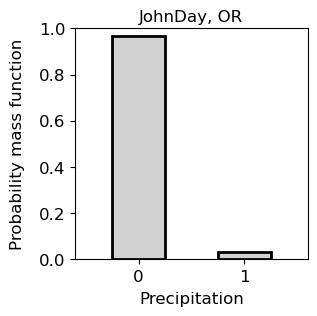

In [4]:
def marginal_1_station(joint_pmf):
    marginal_pmf_1 = np.zeros(2)
    for ind_2 in range(2):
        for ind_3 in range(2):
            marginal_pmf_1 += joint_pmf[:,ind_2,ind_3]
    marginal_pmf_2 = np.zeros(2)
    for ind_1 in range(2):
        for ind_3 in range(2):
            marginal_pmf_2 += joint_pmf[ind_1,:,ind_3]
    marginal_pmf_3 = np.zeros(2)
    for ind_1 in range(2):
        for ind_2 in range(2):
            marginal_pmf_3 += joint_pmf[ind_1,ind_2,:]
    return marginal_pmf_1,marginal_pmf_2,marginal_pmf_3

marginal_pmf_1,marginal_pmf_2,marginal_pmf_3 = marginal_1_station(joint_pmf)
print("Marginal probability mass functions")
print(process_name(file_name_list[stations[0]]))
print(marginal_pmf_1)
print(process_name(file_name_list[stations[1]]))
print(marginal_pmf_2)
print(process_name(file_name_list[stations[2]]))
print(marginal_pmf_3)

vals = [0,1]
ymax = 1.0
xmin = -0.6
xmax = 1.6
plt.figure(figsize=(3,3))
plt.bar(vals,marginal_pmf_1, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 10)
plt.xlabel("Precipitation",fontsize=font_size,labelpad = 5)
plt.title(process_name(file_name_list[stations[0]]),fontsize=font_size,pad=5)

plt.figure(figsize=(3,3))
plt.bar(vals,marginal_pmf_2, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 10)
plt.xlabel("Precipitation",fontsize=font_size,labelpad = 5)
plt.title(process_name(file_name_list[stations[1]]),fontsize=font_size,pad=5)

plt.figure(figsize=(3,3))
plt.bar(vals,marginal_pmf_3, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 10)
plt.xlabel("Precipitation",fontsize=font_size,labelpad = 5)
plt.title(process_name(file_name_list[stations[2]]),fontsize=font_size,pad=5);

In [5]:
def marginal_2_stations(joint_pmf):
    marginal_pmf_12 = np.zeros((2,2))
    for ind_3 in range(2):
        marginal_pmf_12 += joint_pmf[:,:,ind_3]
    marginal_pmf_13 = np.zeros((2,2))
    for ind_2 in range(2):
        marginal_pmf_13 += joint_pmf[:,ind_2,:]
    marginal_pmf_23 = np.zeros((2,2))
    for ind_1 in range(2):
        marginal_pmf_23 += joint_pmf[ind_1,:,:]
    return marginal_pmf_12,marginal_pmf_13,marginal_pmf_23

print("Marginal joint pmf")
marginal_pmf_12,marginal_pmf_13,marginal_pmf_23 = marginal_2_stations(joint_pmf)

print(process_name(file_name_list[stations[0]+1]) + " and " + process_name(file_name_list[stations[1]+1]))
print(marginal_pmf_12)

print(process_name(file_name_list[stations[0]+1]) + " and " + process_name(file_name_list[stations[2]+1]))
print(marginal_pmf_13)

print(process_name(file_name_list[stations[1]+1]) + " and " + process_name(file_name_list[stations[2]+1]))
print(marginal_pmf_23)

Marginal joint pmf
Corvallis, OR and JohnDay, OR
[[0.846 0.04 ]
 [0.056 0.057]]
Corvallis, OR and Riley, OR
[[0.864 0.022]
 [0.102 0.011]]
JohnDay, OR and Riley, OR
[[0.881 0.022]
 [0.086 0.012]]


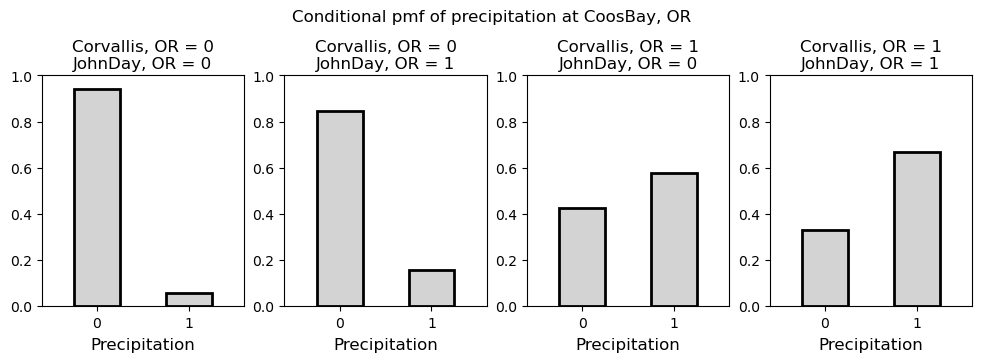

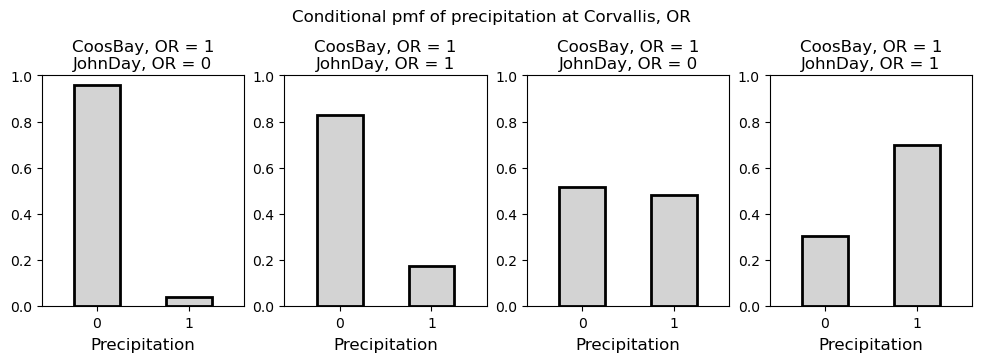

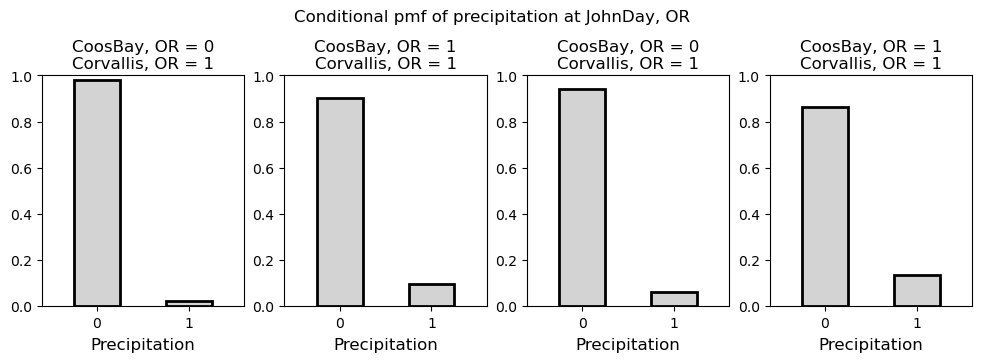

In [6]:
def conditional_1_station_given_2(joint_pmf):
    cond_1_given_23 = np.zeros((2,2,2))
    for ind_2 in range(2):
        for ind_3 in range(2):
            cond_1_given_23[ind_2][ind_3] = joint_pmf[:,ind_2,ind_3] / np.sum(joint_pmf[:,ind_2,ind_3])
    cond_2_given_13 = np.zeros((2,2,2))
    for ind_1 in range(2):
        for ind_3 in range(2):
            cond_2_given_13[ind_1][ind_3] = joint_pmf[ind_1,:,ind_3] / np.sum(joint_pmf[ind_1,:,ind_3])
    cond_3_given_12 = np.zeros((2,2,2))
    for ind_1 in range(2):
        for ind_2 in range(2):
            cond_3_given_12[ind_1][ind_2] = joint_pmf[ind_1,ind_2,:] / np.sum(joint_pmf[ind_1,ind_2,:])        
    return cond_1_given_23,cond_2_given_13,cond_3_given_12

cond_1_given_23,cond_2_given_13,cond_3_given_12 = conditional_1_station_given_2(joint_pmf)

fig, axes = plt.subplots(1, 4, figsize=(12,3),width_ratios=[1,1,1,1])

fig.suptitle("Conditional pmf of precipitation at "+process_name(file_name_list[stations[0]]),fontsize=font_size,y = 1.1)

axes_counter = 0
for ind_2 in range(2):
    for ind_3 in range(2):
        axes[axes_counter].bar(vals,cond_1_given_23[ind_2][ind_3], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        axes[axes_counter].set_xticks(np.arange(0, 1+1, 1))
        axes[axes_counter].set_ylim([0,ymax])
        axes[axes_counter].set_xlim([xmin,xmax])
        axes[axes_counter].set_xlabel("Precipitation",fontsize=font_size,labelpad = 5)
        axes[axes_counter].set_title(process_name(file_name_list[stations[1]])
             + " = " + str(ind_2) + "\n" + process_name(file_name_list[stations[2]])
             + " = " + str(ind_3),fontsize=font_size_ticks,pad=5)
        axes_counter += 1
        
fig, axes = plt.subplots(1, 4, figsize=(12,3),width_ratios=[1,1,1,1])

fig.suptitle("Conditional pmf of precipitation at "+process_name(file_name_list[stations[1]]),fontsize=font_size,y = 1.1)

axes_counter = 0
for ind_1 in range(2):
    for ind_3 in range(2):
        axes[axes_counter].bar(vals,cond_2_given_13[ind_1][ind_3], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        axes[axes_counter].set_xticks(np.arange(0, 1+1, 1))
        axes[axes_counter].set_ylim([0,ymax])
        axes[axes_counter].set_xlim([xmin,xmax])
        axes[axes_counter].set_xlabel("Precipitation",fontsize=font_size,labelpad = 5)
        axes[axes_counter].set_title(process_name(file_name_list[stations[0]])
             + " = " + str(ind_2) + "\n" + process_name(file_name_list[stations[2]])
             + " = " + str(ind_3),fontsize=font_size_ticks,pad=5)
        axes_counter += 1
        
fig, axes = plt.subplots(1, 4, figsize=(12,3),width_ratios=[1,1,1,1])

fig.suptitle("Conditional pmf of precipitation at "+process_name(file_name_list[stations[2]]),fontsize=font_size,y = 1.1)

axes_counter = 0
for ind_1 in range(2):
    for ind_2 in range(2):
        axes[axes_counter].bar(vals,cond_3_given_12[ind_1][ind_2], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        axes[axes_counter].set_xticks(np.arange(0, 1+1, 1))
        axes[axes_counter].set_ylim([0,ymax])
        axes[axes_counter].set_xlim([xmin,xmax])
        axes[axes_counter].set_xlabel("Precipitation",fontsize=font_size,labelpad = 5)
        axes[axes_counter].set_title(process_name(file_name_list[stations[0]])
             + " = " + str(ind_2) + "\n" + process_name(file_name_list[stations[1]])
             + " = " + str(ind_3),fontsize=font_size_ticks,pad=5)
        axes_counter += 1;

In [7]:
def conditional_2_stations_given_1(joint_pmf):
    cond_12_given_3 = np.zeros((2,2,2))
    for ind in range(2):
        cond_12_given_3[ind] = joint_pmf[:,:,ind] / np.sum(joint_pmf[:,:,ind],axis=None)
    cond_13_given_2 = np.zeros((2,2,2))
    for ind in range(2):
        cond_13_given_2[ind] = joint_pmf[:,ind,:] / np.sum(joint_pmf[:,ind,:],axis=None)
    cond_23_given_1 = np.zeros((2,2,2))
    for ind in range(2):
        cond_23_given_1[ind] = joint_pmf[ind,:,:] / np.sum(joint_pmf[ind,:,:],axis=None)
    return cond_12_given_3,cond_13_given_2,cond_23_given_1

cond_12_given_3,cond_13_given_2,cond_23_given_1 = conditional_2_stations_given_1(joint_pmf)

for ind in range(2):
    print(process_name(file_name_list[stations[0]+1]) + " and " + process_name(file_name_list[stations[1]+1])
             + " conditioned on " + process_name(file_name_list[stations[2]+1]) + " = " + str(ind))
    print(cond_12_given_3[ind])
for ind in range(2):
    print(process_name(file_name_list[stations[0]+1]) + " and " + process_name(file_name_list[stations[2]+1])
             + " conditioned on " + process_name(file_name_list[stations[1]+1]) + " = " + str(ind))
    print(cond_13_given_2[ind])
for ind in range(2):
    print(process_name(file_name_list[stations[1]+1]) + " and " + process_name(file_name_list[stations[2]+1])
             + " conditioned on " + process_name(file_name_list[stations[0]+1]) + " = " + str(ind))
    print(cond_23_given_1[ind])

Corvallis, OR and JohnDay, OR conditioned on Riley, OR = 0
[[0.857 0.038]
 [0.055 0.051]]
Corvallis, OR and JohnDay, OR conditioned on Riley, OR = 1
[[0.549 0.115]
 [0.102 0.234]]
Corvallis, OR and Riley, OR conditioned on JohnDay, OR = 0
[[0.917 0.02 ]
 [0.058 0.004]]
Corvallis, OR and Riley, OR conditioned on JohnDay, OR = 1
[[0.373 0.04 ]
 [0.506 0.081]]
JohnDay, OR and Riley, OR conditioned on Corvallis, OR = 0
[[0.934 0.021]
 [0.041 0.004]]
JohnDay, OR and Riley, OR conditioned on Corvallis, OR = 1
[[0.465 0.03 ]
 [0.435 0.069]]


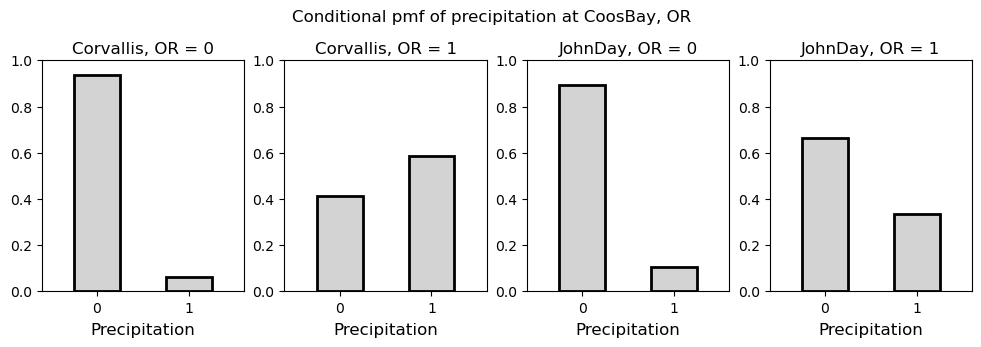

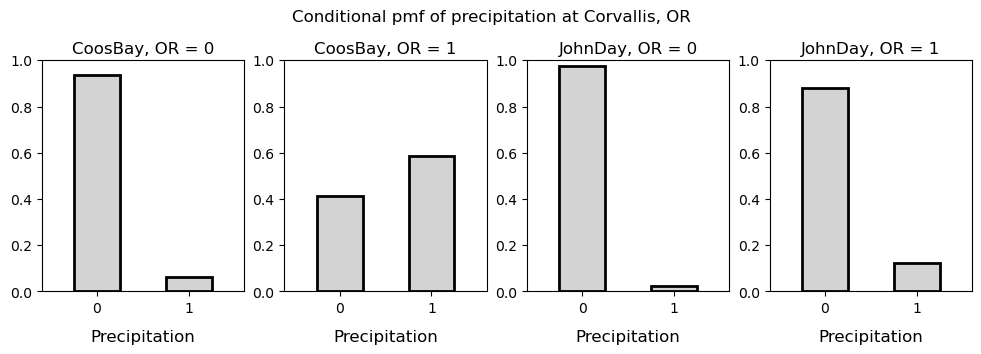

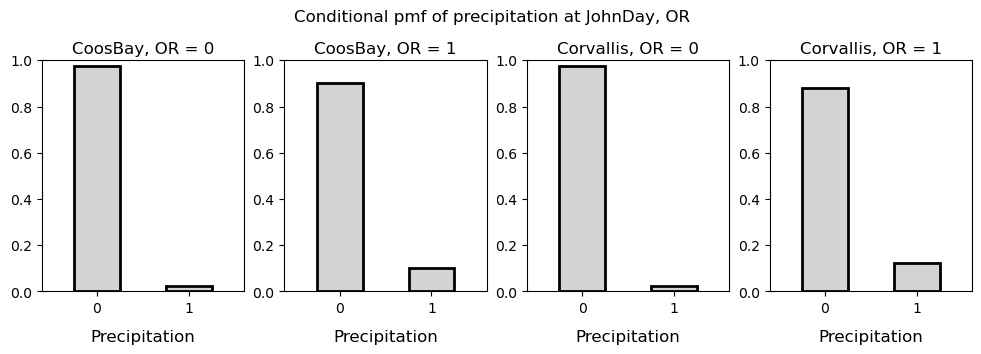

In [8]:
def conditional_1_station_given_1_station(joint_pmf):
    marginal_pmf_12,marginal_pmf_13,marginal_pmf_23 = marginal_2_stations(joint_pmf)
    
    cond_1 = {}
    cond_1["2"]=np.zeros((2,2))
    cond_1["2"][0] = marginal_pmf_12[:,0]/np.sum(marginal_pmf_12[:,0])
    cond_1["2"][1] = marginal_pmf_12[:,1]/np.sum(marginal_pmf_12[:,1])
    cond_1["3"]=np.zeros((2,2))
    cond_1["3"][0] = marginal_pmf_13[:,0]/np.sum(marginal_pmf_13[:,0])
    cond_1["3"][1] = marginal_pmf_13[:,1]/np.sum(marginal_pmf_13[:,1])
    
    cond_2 = {}
    cond_2["1"]=np.zeros((2,2))
    cond_2["1"][0] = marginal_pmf_12[:,0]/np.sum(marginal_pmf_12[:,0])
    cond_2["1"][1] = marginal_pmf_12[:,1]/np.sum(marginal_pmf_12[:,1])
    cond_2["3"]=np.zeros((2,2))
    cond_2["3"][0] = marginal_pmf_23[0,:]/np.sum(marginal_pmf_23[0,:])
    cond_2["3"][1] = marginal_pmf_23[1,:]/np.sum(marginal_pmf_23[1,:])
    
    cond_3 = {}
    cond_3["1"]=np.zeros((2,2))
    cond_3["1"][0] = marginal_pmf_13[0,:]/np.sum(marginal_pmf_13[0,:])
    cond_3["1"][1] = marginal_pmf_13[1,:]/np.sum(marginal_pmf_13[1,:])
    cond_3["2"]=np.zeros((2,2))
    cond_3["2"][0] = marginal_pmf_23[0,:]/np.sum(marginal_pmf_23[0,:])
    cond_3["2"][1] = marginal_pmf_23[1,:]/np.sum(marginal_pmf_23[1,:])
    
    return cond_1,cond_2,cond_3

cond_1,cond_2,cond_3 = conditional_1_station_given_1_station(joint_pmf)

fig, axes = plt.subplots(1, 4, figsize=(12,3),width_ratios=[1,1,1,1])
fig.suptitle("Conditional pmf of precipitation at "+process_name(file_name_list[stations[0]]),fontsize=font_size,y = 1.05)
axes_counter = 0
for given in ["2","3"]:
    for ind in range(2):
        axes[axes_counter].bar(vals,cond_1[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        axes[axes_counter].set_xticks(np.arange(0, 1+1, 1))
        axes[axes_counter].set_ylim([0,ymax])
        axes[axes_counter].set_xlim([xmin,xmax])
        axes[axes_counter].set_xlabel("Precipitation",fontsize=font_size,labelpad = 5)
        axes[axes_counter].set_title(process_name(file_name_list[stations[int(given)-1]])
             + " = " + str(ind),fontsize=font_size,pad=5)
        axes_counter += 1
        
fig, axes = plt.subplots(1, 4, figsize=(12,3),width_ratios=[1,1,1,1])
fig.suptitle("Conditional pmf of precipitation at "+process_name(file_name_list[stations[1]]),fontsize=font_size,y = 1.05)
axes_counter = 0
for given in ["1","3"]:
    for ind in range(2):
        axes[axes_counter].bar(vals,cond_2[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        axes[axes_counter].set_xticks(np.arange(0, 1+1, 1))
        axes[axes_counter].set_ylim([0,ymax])
        axes[axes_counter].set_xlim([xmin,xmax])
        axes[axes_counter].set_xlabel("Precipitation",fontsize=font_size,labelpad = 10)
        axes[axes_counter].set_title(process_name(file_name_list[stations[int(given)-1]])
             + " = " + str(ind),fontsize=font_size,pad=5)
        axes_counter += 1

fig, axes = plt.subplots(1, 4, figsize=(12,3),width_ratios=[1,1,1,1])
fig.suptitle("Conditional pmf of precipitation at "+process_name(file_name_list[stations[2]]),fontsize=font_size,y = 1.05)
axes_counter = 0
for given in ["1","2"]:
    for ind in range(2):
        axes[axes_counter].bar(vals,cond_3[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        axes[axes_counter].set_xticks(np.arange(0, 1+1, 1))
        axes[axes_counter].set_ylim([0,ymax])
        axes[axes_counter].set_xlim([xmin,xmax])
        axes[axes_counter].set_xlabel("Precipitation",fontsize=font_size,labelpad = 10)
        axes[axes_counter].set_title(process_name(file_name_list[stations[int(given)-1]])
             + " = " + str(ind),fontsize=font_size,pad=5)
        axes_counter += 1

In [9]:
stations_indep = [44,105]
for station in stations_indep:
    print(process_name(file_name_list[station])) # list starts at 1

Hilo, HI
Kingston, RI


In [10]:
def compute_joint_pmf_just2(station_1,station_2,data_matrix):
    submatrix = data_matrix[:,[station_1,station_2]]
    total_count = 0.
    counts = np.zeros((2,2))
    for ind in range(submatrix.shape[0]):
        rain_1 = int(submatrix[ind,0] > 0.)
        rain_2 = int(submatrix[ind,1] > 0.)
        total_count += 1
        counts[rain_1,rain_2] += 1
    joint_pmf = counts/total_count
    return counts,joint_pmf

counts_new,joint_pmf_indep = compute_joint_pmf_just2(stations_indep[0],stations_indep[1],data_matrix_2015)

# print(counts)
print("Joint pmf",joint_pmf_indep)

Joint pmf [[0.685 0.059]
 [0.234 0.021]]


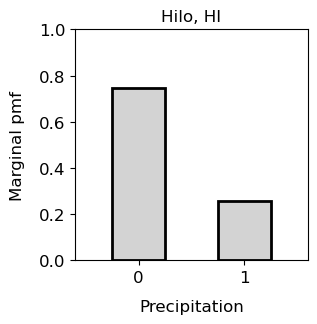

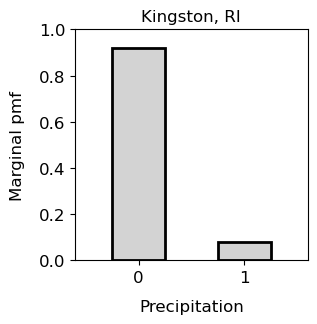

In [11]:
marginal_pmf_1 = np.sum(joint_pmf_indep,axis=1)
marginal_pmf_2 = np.sum(joint_pmf_indep,axis=0)

vals = [0,1]
ymax = 1.0
xmin = -0.6
xmax = 1.6

plt.figure(figsize=(3,3))
plt.bar(vals,marginal_pmf_1, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Marginal pmf",fontsize=font_size,labelpad = 10)
plt.xlabel("Precipitation",fontsize=font_size,labelpad = 10)
plt.title(process_name(file_name_list[stations_indep[0]]),fontsize=font_size)

plt.figure(figsize=(3,3))
plt.bar(vals,marginal_pmf_2, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Marginal pmf",fontsize=font_size,labelpad = 10)
plt.xlabel("Precipitation",fontsize=font_size,labelpad = 10)
plt.title(process_name(file_name_list[stations_indep[1]]),fontsize=font_size);

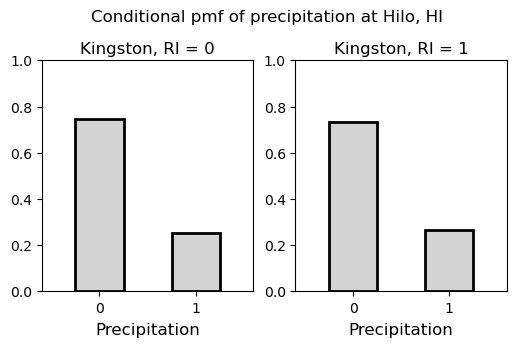

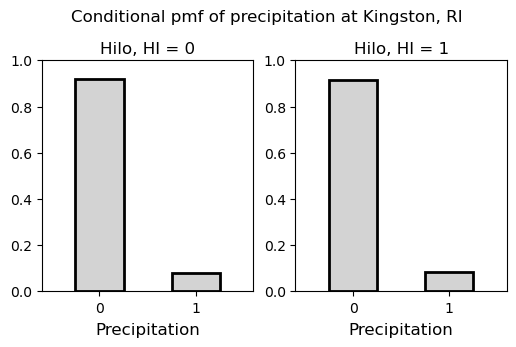

In [12]:
cond_1=np.zeros((2,2))
cond_1[0] = joint_pmf_indep[:,0]/np.sum(joint_pmf_indep[:,0])
cond_1[1] = joint_pmf_indep[:,1]/np.sum(joint_pmf_indep[:,1])
cond_2=np.zeros((2,2))
cond_2[0] = joint_pmf_indep[0,:]/np.sum(joint_pmf_indep[0,:])
cond_2[1] = joint_pmf_indep[1,:]/np.sum(joint_pmf_indep[1,:])

fig, axes = plt.subplots(1, 2, figsize=(6,3),width_ratios=[1,1])
fig.suptitle("Conditional pmf of precipitation at "+process_name(file_name_list[stations_indep[0]]),fontsize=font_size,y = 1.05)
for ind in range(2):
    axes[ind].bar(vals,cond_1[ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
    axes[ind].set_xticks(np.arange(0, 1+1, 1))
    axes[ind].set_ylim([0,ymax])
    axes[ind].set_xlim([xmin,xmax])
    axes[ind].set_xlabel("Precipitation",fontsize=font_size,labelpad = 5)
    axes[ind].set_title(process_name(file_name_list[stations_indep[1]]) + " = " + str(ind),pad = 5,fontsize=font_size)


fig, axes = plt.subplots(1, 2, figsize=(6,3),width_ratios=[1,1])
fig.suptitle("Conditional pmf of precipitation at "+process_name(file_name_list[stations_indep[1]]),fontsize=font_size,y = 1.05)
for ind in range(2):
    axes[ind].bar(vals,cond_2[ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
    axes[ind].set_xticks(np.arange(0, 1+1, 1))
    axes[ind].set_ylim([0,ymax])
    axes[ind].set_xlim([xmin,xmax])
    axes[ind].set_xlabel("Precipitation",fontsize=font_size,labelpad = 5)
    axes[ind].set_title(process_name(file_name_list[stations_indep[0]]) + " = " + str(ind),pad = 5,fontsize=font_size);